### HEALTHCARE INSURANCE PROJECT

This dataset contains information on the relationship between personal attributes (age, gender, BMI, family size, smoking habits), geographic factors, and their impact on medical insurance charges. It can be used to study how these features influence insurance costs and develop predictive models for estimating healthcare expenses

    1. Age: The insured Person's age
    2. Sex: Gender (male or female) of the insured
    3. BMI: (Body Mass Index): A measure of body fat based on height and weight
    4. Children: The number of dependants covered
    5. Region: The geographic area of coverage
    6. Charges: The medical insurance costs incurred by the insured person

### IMPORT THE NECESSARY LIBRARY REQUIRED FOR THIS PROJECT
The following libraries are used for this project:

    1. Pandas
    2. Scikit Learn
    3. Numpy
    4. Matplotlib
    5. Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Checking the sum of null values and it is observed that there is none

In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

A check of the number of Male and Female in this dataset reads that there are 676 Male insured clients and 662 Female Insured clients

In [4]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Axes: ylabel='count'>

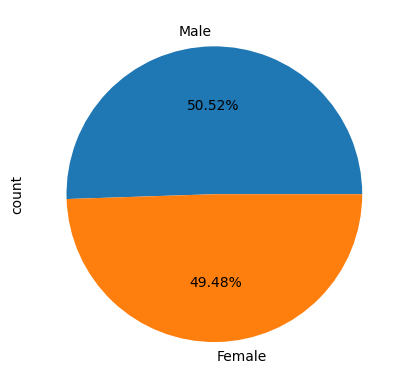

In [5]:
df['sex'].value_counts().plot(kind='pie', labels=['Male', 'Female'], autopct='%1.2f%%')

Checking for the number of smokers in this dataset it is seen that there are more non smokers than smokers amongst the insured

In [6]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<Axes: ylabel='count'>

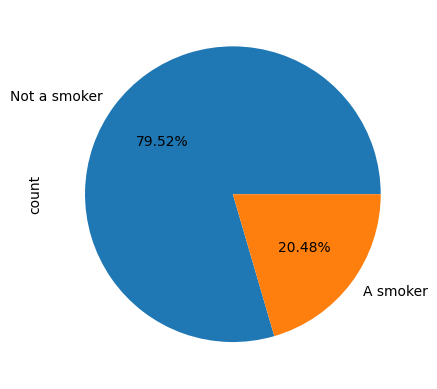

In [7]:
df['smoker'].value_counts().plot(kind='pie', labels=['Not a smoker', 'A smoker'], autopct='%1.2f%%')

From the value counts performed here it is seen that the south east has the highest number of insured clients and north east has the least number of insured clients

In [8]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Axes: ylabel='count'>

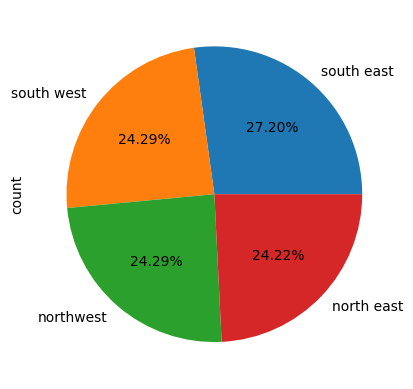

In [9]:
df['region'].value_counts().plot(kind='pie', labels=['south east', 'south west', 'northwest', 'north east'], autopct='%1.2f%%')

### ENCODING THE COLUMNS THAT ARE NOT NUMERICAL

The following columns will be encoded to numerical:

    1. Sex
    2. Smoker
    3. Region

In [37]:
sex_dummies = pd.get_dummies(df['sex']).astype(int)
sex_dummies

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [38]:
smoker_dummies = pd.get_dummies(df['smoker']).astype(int)
smoker_dummies

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [39]:
region_dummies = pd.get_dummies(df['region']).astype(int)
region_dummies

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [40]:
dummies = pd.concat([sex_dummies, smoker_dummies, region_dummies], axis='columns')

In [41]:
df1 = pd.concat([df, dummies], axis='columns')
df1

,age,sex,bmi,children,smoker,region,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,1,0,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,1,0,1,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0,1,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,1,0,0,0,0,1


In [42]:
df2 = df1.drop(['sex', 'smoker', 'region'], axis='columns')
df2

,age,bmi,children,charges,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [43]:
x = df2.drop('charges', axis='columns')
x

,age,bmi,children,female,male,no,yes,northeast,northwest,southeast,southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [44]:
y = df2['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
x_train_scaled = scaler.fit_transform(x_train)

In [50]:
x_test_scaled = scaler.fit_transform(x_test)

### MACHINE LEARNING ALGORITHMS

Algorithms like Linear Regression, Support vector machine, random forest, decision tress, KNeighbors and Neural network, are used to train the dataset, the algorithm with the best performance is being used as the final model both in the local and in the production level.

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [52]:
models = {
    'LR': LinearRegression(),
    'SVM':SVR(),
    'RF': RandomForestRegressor(),
    'DT': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
    'NN': MLPRegressor()
}


In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [54]:
def model_building(model, x_train_scaled, x_test_scaled, y_train, y_test):
    model_fit = model.fit(x_train_scaled, y_train)
    print(model_fit, ':')

    y_pred = model.predict(x_test_scaled)
    MAE = mean_absolute_error(y_test, y_pred)
    print('MAE:', MAE)

    MSE = mean_squared_error(y_test, y_pred)
    print('MSE:', MSE)


In [55]:
for i in range(len(models)):
    model = list(models.values())[i]
    model_building(model, x_train_scaled, x_test_scaled, y_train, y_test)

LinearRegression() :
MAE: 141705857332351.3
MSE: 3.0234413801848435e+28
SVR() :
MAE: 11523.644002483212
MSE: 278347662.6934213
RandomForestRegressor() :
MAE: 2885.1064923912922
MSE: 28179873.764679167
DecisionTreeRegressor() :
MAE: 3481.318290522388
MSE: 48980543.01095735
KNeighborsRegressor() :
MAE: 3748.2200408955227
MSE: 33592773.686680496
MLPRegressor() :
MAE: 16298.97290261007
MSE: 473446501.246088


c:\Users\TeeFaith\anaconda3\envs\kenny\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


After the training and all, it is seen that the linear regression model out performs all other models and will be used for the final model
Linear Regression gave the lowest MEAN ABSOLUTE ERROR OF 1.20 and the lowest MEAN SQUARED ERROR of 1.55

In [56]:
# since the linear regression model performed better than all the rest of the model the data was trained on
model = LinearRegression

In [57]:
import joblib

In [58]:
joblib.dump(model, 'healthcare.pkl')

['healthcare.pkl']